# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
# Data: date_dim.csv
df = pd.read_csv(r"..\data\raw_data\date_dim.csv")
display(df.shape)
display(df.columns)
df.head()

(365, 8)

Index(['date_key', 'year', 'month', 'week', 'day_of_week', 'is_weekend',
       'is_holiday', 'holiday_name'],
      dtype='object')

,date_key,year,month,week,day_of_week,is_weekend,is_holiday,holiday_name
0,01-01-2023,2023,1,52,Sunday,True,True,New Year's Day
1,02-01-2023,2023,1,1,Monday,False,True,New Year's Day Observed
2,03-01-2023,2023,1,1,Tuesday,False,False,NaN
3,04-01-2023,2023,1,1,Wednesday,False,False,NaN
4,05-01-2023,2023,1,1,Thursday,False,False,NaN


### Statistics

In [3]:
print(f"There are {df['date_key'].nunique()} \t unique date_key in the dataset")
print(f"There are {df['year'].nunique()} \t year in the dataset")
print(f"There are {df['month'].nunique()} \t month in the dataset")
print(f"There are {df['week'].nunique()} \t week in the dataset")
print(f"There are {df['day_of_week'].nunique()} \t day_of_week in the dataset")
print(f"There are {df['holiday_name'].nunique()} \t holiday_name in the dataset")

There are 365 	 unique date_key in the dataset
There are 1 	 year in the dataset
There are 12 	 month in the dataset
There are 52 	 week in the dataset
There are 7 	 day_of_week in the dataset
There are 12 	 holiday_name in the dataset


### Histogram plot

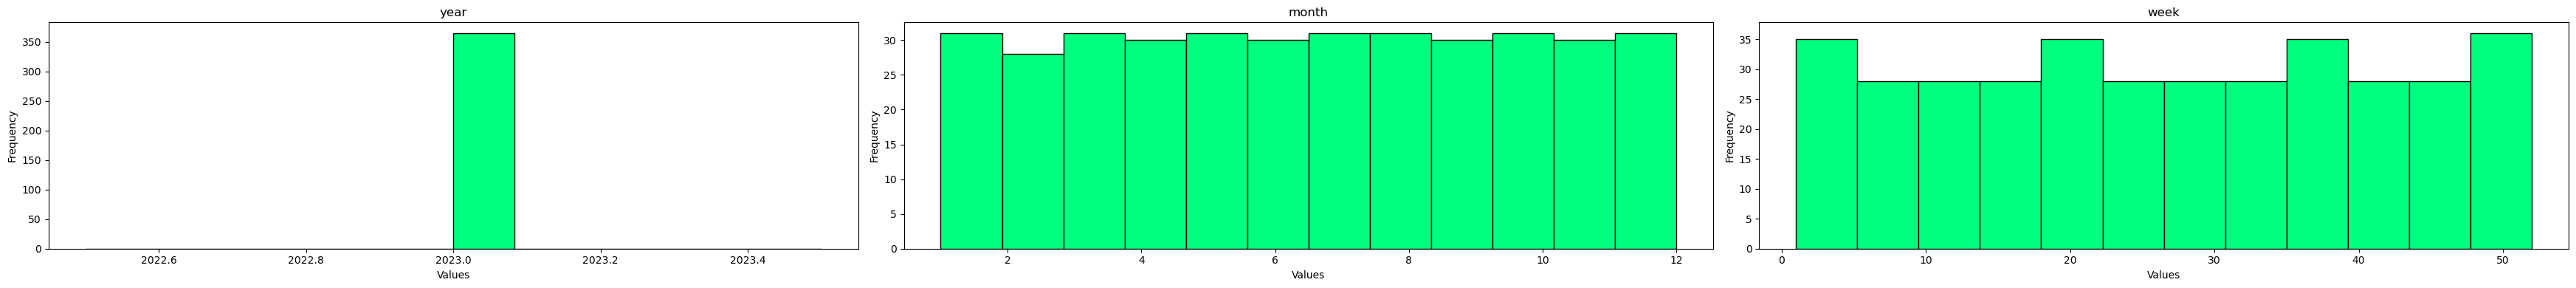

In [4]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*4))

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.hist(df[col], bins=12, color='springgreen', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(numeric_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../Reports/project3_columns_date_dim.png', dpi=300)
plt.show()

### Duplicates

In [5]:
row_dups = df.duplicated().any()
col_dups = df.columns.duplicated().any()

if not row_dups and not col_dups:
    print("No duplicate rows or columns found")
else:
    if row_dups:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    if col_dups:
        print("Duplicate columns:")
        print(df.columns[df.columns.duplicated()])

No duplicate rows or columns found


### Consider Unique key 

In [6]:
unique_key_dups = df[['date_key']].duplicated().any()
unique_key_dups

np.False_

### Missing values

In [7]:
print(f"Is there missing values in the master_dataset?  {df.isna().any().any()}")
display(missing_values_1 := df.isnull().sum())

Is there missing values in the master_dataset?  True


date_key          0
year              0
month             0
week              0
day_of_week       0
is_weekend        0
is_holiday        0
holiday_name    353
dtype: int64

### Outliers

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns
text_cols = df.select_dtypes(exclude=np.number).columns

print("Number of numeric columns:", len(numeric_cols))
print("Numeric columns:", numeric_cols.tolist())

print("Number of text columns:", len(text_cols))
print("Text columns:", text_cols.tolist())

Number of numeric columns: 3
Numeric columns: ['year', 'month', 'week']
Number of text columns: 5
Text columns: ['date_key', 'day_of_week', 'is_weekend', 'is_holiday', 'holiday_name']


In [9]:
display(df[text_cols].nunique())
display(df[text_cols].isna().sum())


date_key        365
day_of_week       7
is_weekend        2
is_holiday        2
holiday_name     12
dtype: int64

date_key          0
day_of_week       0
is_weekend        0
is_holiday        0
holiday_name    353
dtype: int64

In [10]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
)

# Number of outliers per column
outliers.sum()

year     0
month    0
week     0
dtype: int64